In [26]:
import matplotlib.pyplot as plt;
import numpy as np;
import pandas as pd;
from sklearn.model_selection import train_test_split;

In [27]:
full_data = pd.read_csv(
    r"F:\Personal Projects\ML-and-DL-Optimisation-Methods\Datasets\housing.csv",
    sep=r'\s+', header=None, encoding="utf-8", engine='python'
);
#print(full_data.head(10));
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
];
full_labelled_data = full_data.copy();
full_labelled_data.columns = column_names;
#print(full_labelled_data.head(10));
data_in_numpy = full_data.to_numpy();
#print(data_in_numpy);
X = data_in_numpy[:,0:data_in_numpy.shape[1]-1];
#print(X.shape);
Y = data_in_numpy[:,data_in_numpy.shape[1]-1].reshape((506,1));
#print(Y);
ones = np.ones((data_in_numpy.shape[0],1));
Design_X = np.hstack((ones, X));
#print(Design_X.shape);
X_train,X_test,Y_Train,Y_Test = train_test_split(Design_X,Y,train_size=0.8,random_state=5809);
print(X_train.shape,X_test.shape,Y_Train.shape,Y_Test.shape);

(404, 14) (102, 14) (404, 1) (102, 1)


In [28]:
# Initialisations
MAErrors = [];
costs = [];
grads = [];
theta = np.zeros((X_train.shape[1], 1))
#print(theta.shape);
step_size = 1e-6;
n = X_train.shape[0];

Y_pred = X_train @ theta
#print(Y_pred.shape);
#print(Y_Train.shape);
Y_pred = X_train @ theta
error = Y_pred - Y_Train;
mae = np.mean(np.abs(error));


MAErrors.append(mae);
print(mae);

cost = (error.T@error)/n;
print(cost[0][0]);
costs.append(cost[0][0]);
grad = (X_train.T@(error))*2/n;
print(grad)
grads.append(grad);

22.553960396039603
595.9976237623762
[[-4.51079208e+01]
 [-9.92867141e+01]
 [-6.81274257e+02]
 [-4.43839866e+02]
 [-4.08267327e+00]
 [-2.41059498e+01]
 [-2.92508929e+02]
 [-2.92557465e+03]
 [-1.81435754e+02]
 [-3.56108416e+02]
 [-1.67787550e+04]
 [-8.09939653e+02]
 [-1.66169268e+04]
 [-4.73455163e+02]]


In [ ]:

for i in range(10000001):
    theta = theta-step_size*grad;
    Y_pred = X_train @ theta;
    error = Y_pred - Y_Train;
    mae = np.mean(np.abs(error));
    MAErrors.append(mae);
    #print(mae);    
    cost = (error.T@error)/n;
    #print(cost);
    costs.append(cost);
    grad = (X_train.T@(error))*2/n;
    #print(grad);
    grads.append(grad);
    '''if i % 10000 == 0:
        mae = np.mean(np.abs(error));
        cost = (error.T @ error) / n;
        print(f"Iter {i} | MAE: {mae:.4f} | Cost: {cost[0][0]:.4f}");
    '''

Iter 0 | MAE: 11.1094 | Cost: 201.0314
Iter 10000 | MAE: 5.6435 | Cost: 58.4129
Iter 20000 | MAE: 5.4206 | Cost: 52.6191
Iter 30000 | MAE: 5.3168 | Cost: 49.9165
Iter 40000 | MAE: 5.2366 | Cost: 48.3006
Iter 50000 | MAE: 5.1715 | Cost: 47.1534
Iter 60000 | MAE: 5.1126 | Cost: 46.2499
Iter 70000 | MAE: 5.0598 | Cost: 45.4927
Iter 80000 | MAE: 5.0134 | Cost: 44.8319
Iter 90000 | MAE: 4.9718 | Cost: 44.2386
Iter 100000 | MAE: 4.9339 | Cost: 43.6943
Iter 110000 | MAE: 4.8985 | Cost: 43.1869
Iter 120000 | MAE: 4.8657 | Cost: 42.7085
Iter 130000 | MAE: 4.8340 | Cost: 42.2532
Iter 140000 | MAE: 4.8040 | Cost: 41.8173
Iter 150000 | MAE: 4.7755 | Cost: 41.3979
Iter 160000 | MAE: 4.7476 | Cost: 40.9931
Iter 170000 | MAE: 4.7204 | Cost: 40.6015
Iter 180000 | MAE: 4.6941 | Cost: 40.2219
Iter 190000 | MAE: 4.6682 | Cost: 39.8536
Iter 200000 | MAE: 4.6427 | Cost: 39.4959
Iter 210000 | MAE: 4.6176 | Cost: 39.1482
Iter 220000 | MAE: 4.5929 | Cost: 38.8102
Iter 230000 | MAE: 4.5686 | Cost: 38.4815
Iter

In [30]:
print(theta);

[[ 1.69346186e+00]
 [-9.60704069e-02]
 [ 4.97501489e-02]
 [ 7.71366684e-04]
 [ 2.00936193e+00]
 [ 6.67238890e-02]
 [ 5.55934396e+00]
 [-7.78228020e-03]
 [-8.87970452e-01]
 [ 2.12277295e-01]
 [-1.12936356e-02]
 [-4.13244150e-01]
 [ 1.50606155e-02]
 [-4.54678252e-01]]


In [31]:
# Testing and R2 scores!

y_final_pred = X_test@theta;
final_error = y_final_pred-Y_Test;
residuals = final_error;
ss_res = np.sum(residuals**2);
Y_mean = np.mean(Y_Test);
ss_tot = np.sum((y_final_pred-Y_mean)**2);
R2 = 1-(ss_res/ss_tot);
print(R2);

0.6969803636788778


In [32]:
# 1. Train R2
pred_train = X_train @ theta
r2_train = 1 - (np.sum((Y_Train - pred_train)**2) / np.sum((Y_Train - np.mean(Y_Train))**2))

# 2. Test R2
pred_test = X_test @ theta
r2_test = 1 - (np.sum((Y_Test - pred_test)**2) / np.sum((Y_Test - np.mean(Y_Test))**2))

print(f"Training R2: {r2_train:.4f}")
print(f"Testing R2:  {r2_test:.4f}")

Training R2: 0.7016
Testing R2:  0.7764


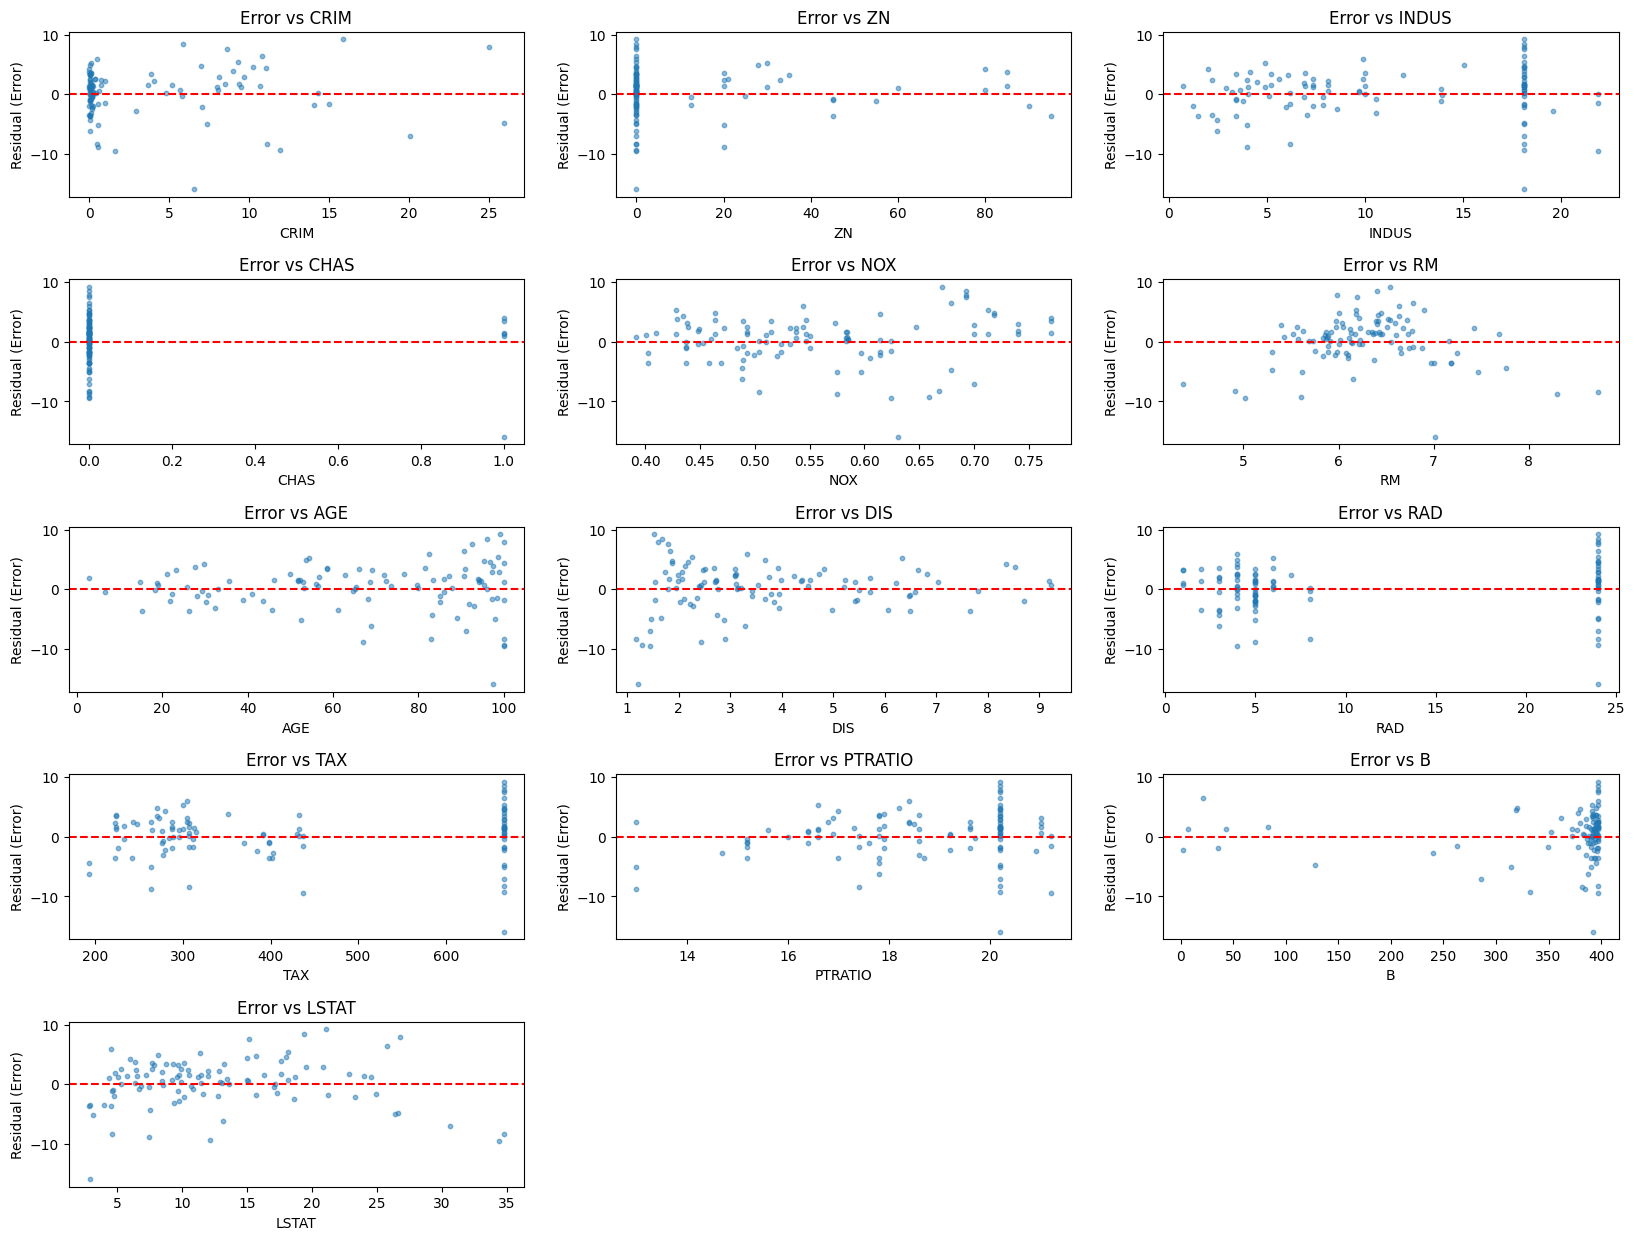

In [37]:
# Error vs Feature Graphs!

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'];
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5)
for i in range(13):
    plt.subplot(5, 3, i + 1)
    
    # X_test[:, i+1] skips the bias column to get the actual feature
    plt.scatter(X_test[:, i+1], final_error, alpha=0.5, s=10)
    
    # Add a horizontal line at zero error
    plt.axhline(y=0, color='r', linestyle='--')
    
    plt.title(f'Error vs {feature_names[i]}')
    plt.xlabel(feature_names[i])
    plt.ylabel('Residual (Error)')

plt.show()